# Exploring data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## Fixing data

In [2]:
!ls ../../data

clean_kc_house_data.csv
column_names.md
kc_house_data.csv


In [3]:
data = pd.read_csv('../../data/clean_kc_house_data.csv')

In [4]:
data = data.drop(columns='Unnamed: 0')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


In [6]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


# Target: Predicting sale price

## Simple model

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20970 entries, 0 to 20969
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20970 non-null  int64         
 1   date           20970 non-null  datetime64[ns]
 2   price          20970 non-null  float64       
 3   bedrooms       20970 non-null  int64         
 4   bathrooms      20970 non-null  float64       
 5   sqft_living    20970 non-null  int64         
 6   sqft_lot       20970 non-null  int64         
 7   floors         20970 non-null  float64       
 8   condition      20970 non-null  object        
 9   grade          20970 non-null  object        
 10  sqft_above     20970 non-null  int64         
 11  sqft_basement  20970 non-null  float64       
 12  yr_built       20970 non-null  int64         
 13  zipcode        20970 non-null  int64         
 14  lat            20970 non-null  float64       
 15  long           2097

<AxesSubplot:>

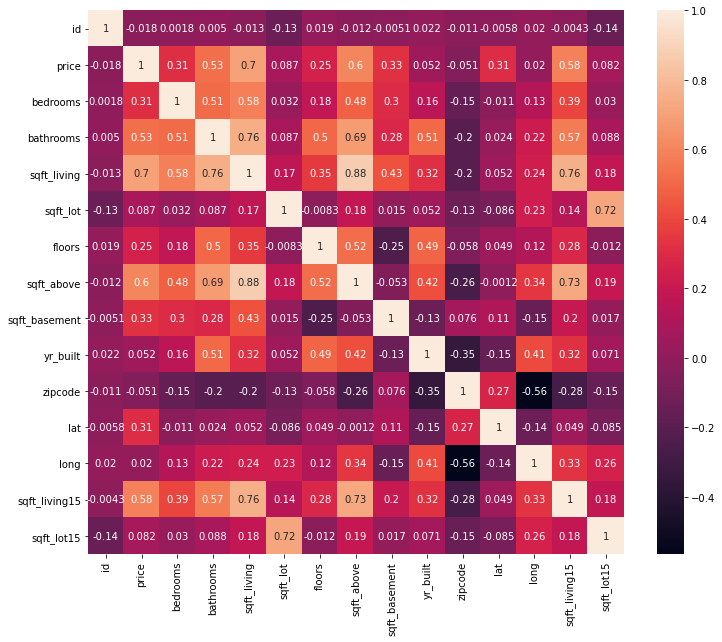

In [9]:
plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

In [10]:
X = data['sqft_living']
y = data['price']

In [11]:
simple_model = sm.OLS(y, sm.add_constant(X)).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:21:37   Log-Likelihood:            -2.9141e+05
No. Observations:               20970   AIC:                         5.828e+05
Df Residuals:                   20968   BIC:                         5.828e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.359e+04   4489.339     -9.710      0.000   -5.24e+04   -3.48e+04
sqft_living   281.0601      1.971    142.586      0.000     277.197     284.924
==============================================================================
Omnibus:                    14429.476   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534860.122
Skew:                           2.833   Prob(JB):                         0.00
Kurtosis:                      27.084   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Kitchen sink model

In [12]:
#multiple linear regression, kitchen-sink model
X_mult = data.drop(columns=['id', 'zipcode', 'lat', 'long', 'date', 'condition', 'grade', 'price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_mult, y, test_size=0.25, random_state=23)

In [13]:
X_mult.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,6,3.00,2400,9373,2.0,2400,0.0,1991,2060,7316
1,4,1.75,2060,26036,1.0,1160,900.0,1947,2590,21891


In [14]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

train_pred = lr.predict(X_train_scaled) 
test_pred = lr.predict(X_test_scaled)

In [16]:
print(f"Train R2 Score: {r2_score(y_train, train_pred):.4f}")
print(f"Train RMSE Score: {mean_squared_error(y_train, train_pred, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_pred):.4f}")
print(f"Test RMSE Score: {mean_squared_error(y_test, test_pred, squared=False):.4f}")

Train R2 Score: 0.5656
Train RMSE Score: 240739.4775
********************
Test R2 Score: 0.5793
Test RMSE Score: 244553.4731


In [17]:
lr.coef_

array([ -59690.95449694,   55330.087805  ,  116448.89557525,
         -3060.32196592,   29964.60138894,   99475.96392705,
         55687.38207534, -104376.68678741,   61756.78710782,
        -15662.83125691])

In [18]:
# Look at the coefs from our sklearn model
dict(zip(X_mult.keys(), lr.coef_))

{'bedrooms': -59690.9544969396,
 'bathrooms': 55330.08780500324,
 'sqft_living': 116448.89557524883,
 'sqft_lot': -3060.3219659235347,
 'floors': 29964.60138893525,
 'sqft_above': 99475.96392704883,
 'sqft_basement': 55687.38207533875,
 'yr_built': -104376.68678740742,
 'sqft_living15': 61756.78710782222,
 'sqft_lot15': -15662.831256912299}

### Creating another multiple variable model
- Using the variables with highest coeff.

In [89]:
def heatmap_variables(dataframe):
    '''
    Creates a heatmap of the variables passed
    data: type pandas DataFrame
    '''
    plt.subplots(figsize=(12,10))
    sns.heatmap(dataframe.corr(), annot=True)

In [20]:
def get_scaled_scores_coeff(variables,  target):
    '''
    Takes in a DataFrame and target value.
    Returns r-square value, RMSE score, and coefficiants.
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.33, random_state=42)
    
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lr.fit(X_train_scaled, y_train)

    train_pred = lr.predict(X_train_scaled) 
    test_pred = lr.predict(X_test_scaled)
    
    print(f"Train R2 Score: {r2_score(y_train, train_pred):.4f}")
    print(f"Train RMSE Score: {mean_squared_error(y_train, train_pred, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_test, test_pred):.4f}")
    print(f"Test RMSE Score: {mean_squared_error(y_test, test_pred, squared=False):.4f}")

    return dict(zip(variables.keys(), lr.coef_))

In [71]:
def evaluate_model(X_tr, X_te, y_tr, y_te, log=False):
    '''
    Imports:
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    import numpy as np
    import matplotlib.pyplot as plt
    
    Takes in training and testing data from a train_test_split function.
    Prints an evaluation of r-square value with mean absolute error and mean squared error.
    Visualizes residuals with y-values.
    Returns training predictions, test predictions, and coeffeciants.
    
    log=True : logs the predictions
    '''
    #grab predictions
#     model = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
#     summary = model.summary()
    
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    tr_preds = lr.predict(X_tr) 
    te_preds = lr.predict(X_te)
    
    print('\n')
    
    #Evaluate
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    if log == True:
        y_tr_unlog = np.expm1(y_tr)
        tr_preds_unlog = np.expm1(tr_preds)      
        print(f"Train MAE Score: ${mean_absolute_error(y_tr_unlog, tr_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr_unlog, tr_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    if log == True:
        y_te_unlog = np.expm1(y_te)
        te_preds_unlog = np.expm1(te_preds)
        print(f"Test MAE Score: ${mean_absolute_error(y_te_unlog, te_preds_unlog):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te_unlog, te_preds_unlog, squared=False):.4f}")          
    else:
        print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
        print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")  
    print("*"*20)
    
    #Visualize
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    
    #getting coeff
#     print(summary)
    
    return tr_preds, te_preds, lr.coef_

In [155]:
def get_coeff_num(X_tr, y_tr):
    lr = LinearRegression()
    lr.fit(X_tr, y_tr)
    return lr.coef_

In [156]:
def get_coeff(X_tr, y_tr):
    return dict(zip(ct.get_feature_names(), get_coeff_num(X_tr, y_tr)))

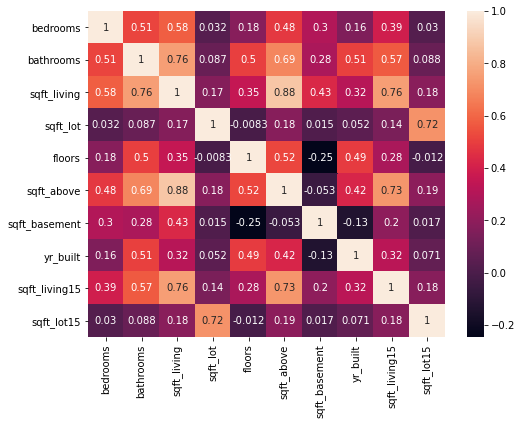

In [22]:
heatmap_variables(X_mult)

In [23]:
rel_col = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built']]
y = data['price']

get_scaled_scores_coeff(rel_col, y)

Train R2 Score: 0.5630
Train RMSE Score: 243696.2805
********************
Test R2 Score: 0.5417
Test RMSE Score: 248720.4100


{'bedrooms': -72779.44413364712,
 'bathrooms': 53351.651719322625,
 'sqft_living': 289698.0999221195,
 'sqft_lot': -14394.38392578093,
 'floors': 26949.1165449678,
 'sqft_basement': -3051.0727110911703,
 'yr_built': -101149.41104942799}

In [24]:
top4 = data[['bedrooms', 'bathrooms', 'sqft_living', 'yr_built']]

get_scaled_scores_coeff(top4, y)

Train R2 Score: 0.5573
Train RMSE Score: 245283.1684
********************
Test R2 Score: 0.5360
Test RMSE Score: 250251.0785


{'bedrooms': -73466.3882101106,
 'bathrooms': 64268.25168073601,
 'sqft_living': 284867.71605063643,
 'yr_built': -92118.41455642699}

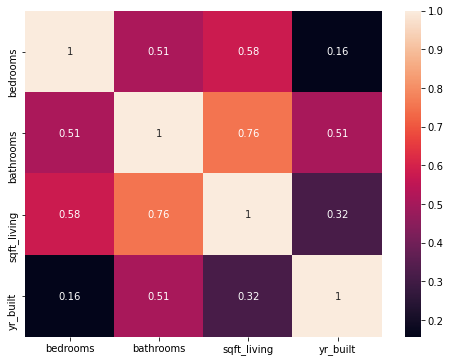

In [25]:
heatmap_variables(top4)

# less complicated model
- condensing kitchen sink approach

In [26]:
top3 = top4.drop(columns='bathrooms')
get_scaled_scores_coeff(top3, y)

Train R2 Score: 0.5471
Train RMSE Score: 248089.6983
********************
Test R2 Score: 0.5255
Test RMSE Score: 253078.9899


{'bedrooms': -64395.10115232053,
 'sqft_living': 321706.4022291866,
 'yr_built': -72677.65069070162}

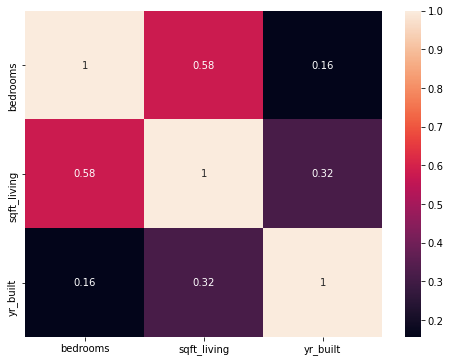

In [27]:
heatmap_variables(top3)

# one hot coding

In [28]:
data.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [29]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
1,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,98166,47.4444,-122.351,2590,21891
2,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,98166,47.4434,-122.347,2250,20023
3,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,98168,47.4783,-122.265,1290,10320
4,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,98144,47.5803,-122.294,1480,3504


In [30]:
X_mult2 = data.drop(columns=['id', 'zipcode', 'lat', 'long', 'date', 'price'])

In [37]:
X_mult2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,6,3.00,2400,9373,2.0,Average,7 Average,2400,0.0,1991,2060,7316
1,4,1.75,2060,26036,1.0,Good,8 Good,1160,900.0,1947,2590,21891
2,3,1.00,1460,43000,1.0,Average,7 Average,1460,0.0,1952,2250,20023
3,3,1.00,1430,7599,1.5,Good,6 Low Average,1010,420.0,1930,1290,10320
4,4,2.00,1650,3504,1.0,Average,7 Average,760,890.0,1951,1480,3504


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_mult2, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [103]:
cat_cols = ['condition', 'grade']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [87]:
scaler = StandardScaler()

scaler.fit(X_train_enc)

X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

X_train_sc_df = pd.DataFrame(X_train_scaled, columns= ct.get_feature_names())
# X_train_sc_df.head()



Train R2 Score: 0.6547
Train MAE Score: $138404.8400
Train RMSE Score: $216627.5971
********************
Test R2 Score: 0.6436
Test MAE Score: $138768.6476
Test RMSE Score: $219333.8352
********************


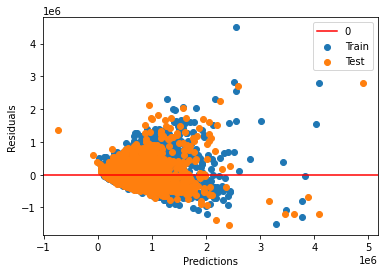

(array([229781.93975472, 292856.38071358, 653768.029771  , ...,
        339277.29315254, 295144.73565043, 337020.29641711]),
 array([299572.92537588, 296055.14511687, 676305.73787962, ...,
        757386.78341851, 303244.42456916, 318338.71896849]),
 array([  -1372.46043223,    8018.76035406,    -659.80394047,
          14156.06572821,   42346.03993566,   52860.93673808,
          48034.65455284,   -4922.65773567,  -19175.73809111,
         -53209.60102571, -139595.08040713, -198343.31045459,
        -142902.62571084,  -57199.14587664,  -36920.4927374 ,
          40687.72602817,   66241.06332166,    -469.83968564,
          27798.34350923,   46198.90300988,   50718.78612476,
        -104605.42495705,   25617.39254693,  -13453.63906287]))

In [86]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
plt.subplots(figsize=(16,12))
sns.heatmap(dataframe.corr(), annot=True)

# OHE with top3

In [127]:
top3.head(2)

,bedrooms,sqft_living,yr_built
0,6,2400,1991
1,4,2060,1947


In [171]:
top5 = data[['sqft_living', 'yr_built', 'grade', 'condition']]

In [172]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(top5, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [173]:
cat_cols = ['grade', 'condition']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train2)
X_train_enc2 = ct.transform(X_train2)
X_test_enc2 = ct.transform(X_test2)

In [174]:
scaler = StandardScaler()

scaler.fit(X_train_enc2)

X_train_scaled2 = scaler.transform(X_train_enc2)
X_test_scaled2 = scaler.transform(X_test_enc2)

good_df = pd.DataFrame(X_train_scaled2, columns= ct.get_feature_names())



Train R2 Score: 0.6379
Train MAE Score: $142906.6448
Train RMSE Score: $221833.7249
********************
Test R2 Score: 0.6310
Test MAE Score: $142328.1667
Test RMSE Score: $223175.9412
********************


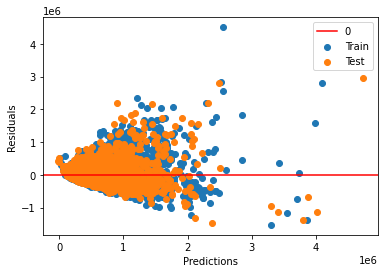

(array([231077.60620009, 289515.38607383, 573818.08848455, ...,
        361269.98316518, 326896.15067996, 300541.04462835]),
 array([325542.12536436, 322417.9374177 , 676015.19759443, ...,
        881928.39411334, 319362.49314069, 313037.79641497]),
 array([  43593.96123415,   55334.39892075,   49651.59646432,
          -5069.25245159,  -20415.89372371,  -59318.29570505,
        -159441.78653012, -225079.08464209, -153183.67875734,
         -62304.66816534,   -2331.45069706,    3327.05990001,
           -264.69517958,   14897.69082329,  143678.07710601,
         -91762.61179707]))

In [175]:
evaluate_model(X_train_scaled2, X_test_scaled2, y_train2, y_test2)

In [176]:
good_df

,ohe__x0_11 Excellent,ohe__x0_12 Luxury,ohe__x0_13 Mansion,ohe__x0_3 Poor,ohe__x0_4 Low,ohe__x0_5 Fair,ohe__x0_6 Low Average,ohe__x0_7 Average,ohe__x0_8 Good,ohe__x0_9 Better,ohe__x1_Fair,ohe__x1_Good,ohe__x1_Poor,ohe__x1_Very Good,sqft_living,yr_built
0,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,3.097583,-0.838643,-0.622540,-0.374992,-0.08467,-0.591133,-0.036800,-0.293181,-1.483768,-1.064414
1,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,3.097583,-0.838643,-0.622540,-0.374992,-0.08467,-0.591133,27.173904,-0.293181,-1.287969,-1.473167
2,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,-0.322832,1.192403,-0.622540,-0.374992,-0.08467,1.691667,-0.036800,-0.293181,-0.461258,-2.154420
3,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,-0.322832,-0.838643,1.606324,-0.374992,-0.08467,-0.591133,-0.036800,-0.293181,-0.015269,-0.553474
4,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,-0.322832,1.192403,-0.622540,-0.374992,-0.08467,-0.591133,-0.036800,-0.293181,-0.330724,-0.246910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,7.184565,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,-0.322832,-0.838643,-0.622540,-0.374992,-0.08467,-0.591133,-0.036800,-0.293181,2.399597,0.877158
14045,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,3.097583,-0.838643,-0.622540,-0.374992,-0.08467,-0.591133,-0.036800,3.410864,-0.874613,-2.018170
14046,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,-0.322832,1.192403,-0.622540,-0.374992,-0.08467,1.691667,-0.036800,-0.293181,-0.809346,-0.383161
14047,-0.139187,-0.068177,-0.02387,-0.008437,-0.033766,-0.101407,3.097583,-0.838643,-0.622540,-0.374992,-0.08467,-0.591133,-0.036800,3.410864,-0.918124,-0.621600


<AxesSubplot:>

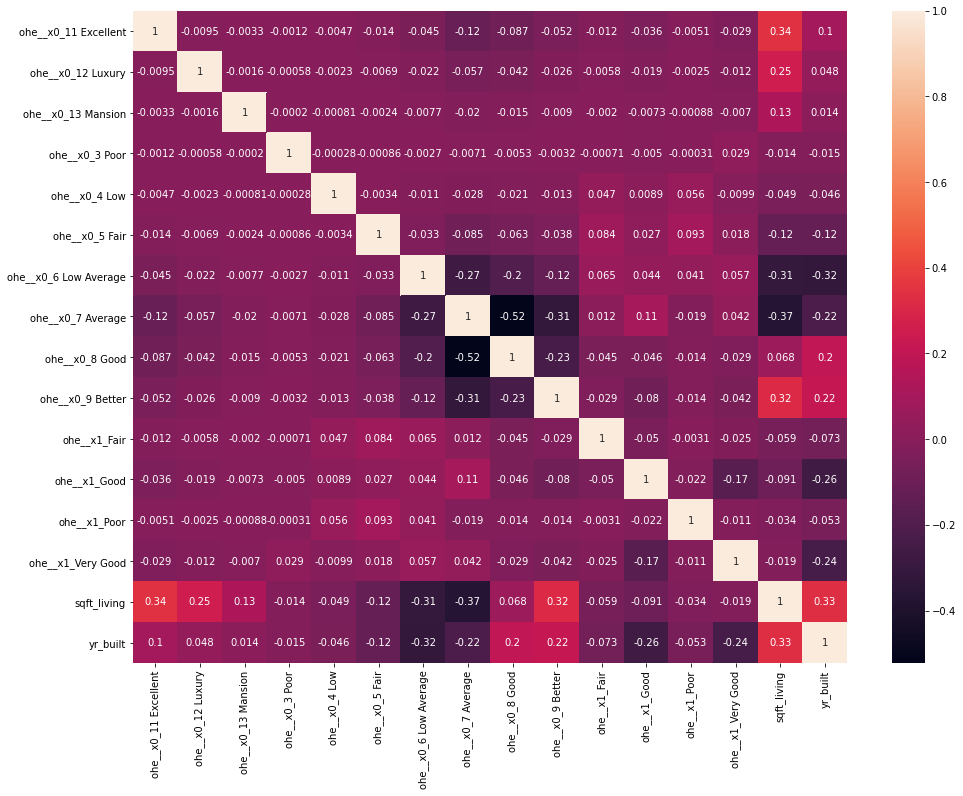

In [177]:
plt.subplots(figsize=(16,12))
sns.heatmap(good_df.corr(), annot=True)

In [178]:
get_coeff(X_train_scaled2, y_train2)

{'ohe__x0_11 Excellent': 43593.961234146765,
 'ohe__x0_12 Luxury': 55334.39892074569,
 'ohe__x0_13 Mansion': 49651.59646432248,
 'ohe__x0_3 Poor': -5069.252451593882,
 'ohe__x0_4 Low': -20415.893723708956,
 'ohe__x0_5 Fair': -59318.295705051794,
 'ohe__x0_6 Low Average': -159441.78653012234,
 'ohe__x0_7 Average': -225079.08464208525,
 'ohe__x0_8 Good': -153183.67875734184,
 'ohe__x0_9 Better': -62304.66816533653,
 'ohe__x1_Fair': -2331.4506970627235,
 'ohe__x1_Good': 3327.059900007964,
 'ohe__x1_Poor': -264.69517958122515,
 'ohe__x1_Very Good': 14897.69082328999,
 'sqft_living': 143678.07710601357,
 'yr_built': -91762.61179706833}

In [179]:
dict(sorted(get_coeff(X_train_scaled2, y_train2).items(), key=lambda x:x[1]))

{'ohe__x0_7 Average': -225079.08464208525,
 'ohe__x0_6 Low Average': -159441.78653012234,
 'ohe__x0_8 Good': -153183.67875734184,
 'yr_built': -91762.61179706833,
 'ohe__x0_9 Better': -62304.66816533653,
 'ohe__x0_5 Fair': -59318.295705051794,
 'ohe__x0_4 Low': -20415.893723708956,
 'ohe__x0_3 Poor': -5069.252451593882,
 'ohe__x1_Fair': -2331.4506970627235,
 'ohe__x1_Poor': -264.69517958122515,
 'ohe__x1_Good': 3327.059900007964,
 'ohe__x1_Very Good': 14897.69082328999,
 'ohe__x0_11 Excellent': 43593.961234146765,
 'ohe__x0_13 Mansion': 49651.59646432248,
 'ohe__x0_12 Luxury': 55334.39892074569,
 'sqft_living': 143678.07710601357}